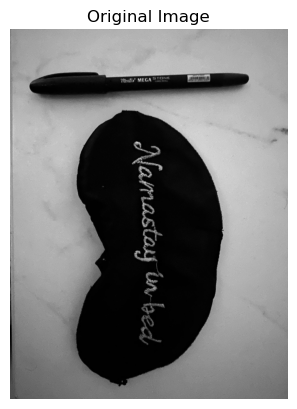

In [1]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

# Load the image
image = cv2.imread('C:/Users/Admin/Pictures/task6.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


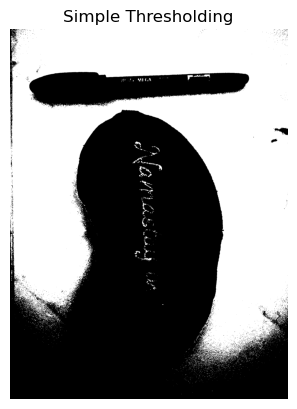

In [2]:
# Apply Simple Thresholding
_, simple_threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(simple_threshold, cmap='gray')
plt.title('Simple Thresholding')
plt.axis('off')
plt.show()


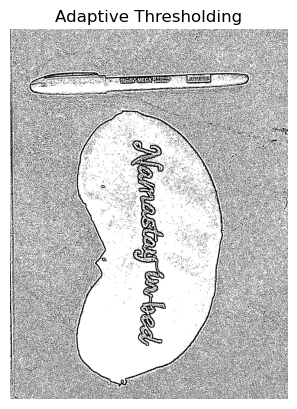

In [3]:
# Apply Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the result
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()


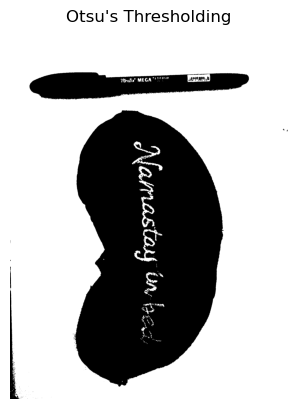

In [4]:
# Apply Otsu's Thresholding
_, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the result
plt.imshow(otsu_threshold, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()


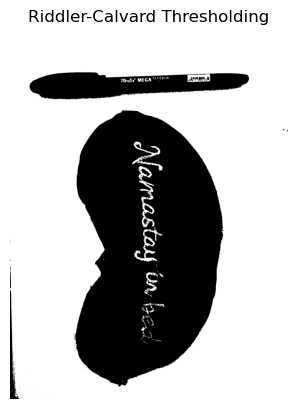

In [5]:
# Riddler-Calvard Thresholding Function
def riddler_calvard(image):
    threshold = np.mean(image)
    prev_threshold = 0
    while abs(threshold - prev_threshold) > 1e-5:
        prev_threshold = threshold
        foreground = image >= threshold
        background = image < threshold
        foreground_mean = np.mean(image[foreground])
        background_mean = np.mean(image[background])
        threshold = (foreground_mean + background_mean) / 2
    return threshold

# Apply Riddler-Calvard Thresholding
riddler_calvard_threshold = image >= riddler_calvard(image)

# Display the result
plt.imshow(riddler_calvard_threshold, cmap='gray')
plt.title('Riddler-Calvard Thresholding')
plt.axis('off')
plt.show()
